## Preparation

##### Import Functions

In [1]:
from Scripts.LoadImage import LoadImage as LoadImage
from Scripts.Fuzzify import Fuzzify as Fuzzify
from Scripts.OptimizeBruteForceKFold import OptimizeBruteForceKFold as OptimizeBruteForceKFold
from Scripts.ValueTest import ValueTest as ValueTest
from Scripts.OptimizeBruteForce import OptimizeBruteForce as OptimizeBruteForce
from Class.Helper import Helper as Helper
import warnings
warnings.simplefilter("ignore")

##### Import Settings

In [2]:
import Settings.SettingsKi67 as settings

##### Load Image

In [5]:
loadImage = LoadImage()
samples_stats, train_stats, test_stats, train_samples = loadImage.worker(settings, False)

../Data/Ki67-Example/background.png
../Data/Ki67-Example/blue.png
../Data/Ki67-Example/brown.png


In [60]:
fuzzify = Fuzzify()
changed_decisions, features_number_after_reduct, implicants_number, fuzzify_parameters = fuzzify.worker(settings, -1)

TypeError: calculateSigma() missing 1 required positional argument: 'sigma_value'

In [7]:
helper = Helper()

fuzzification_data = [settings["dataset_name"] + " - New Gausses", settings["gausses"], samples_stats, train_stats, test_stats, changed_decisions, round(changed_decisions / train_samples, 2), implicants_number, settings["feature_numbers"], features_number_after_reduct]
helper.saveFuzzificationStats(fuzzification_data)

fuzzification_parameters_data = [settings["dataset_name"] + " - New Gausses", settings["gausses"], settings.sigma_mean_params] + fuzzify_parameters
helper.saveFuzzificationParameters(fuzzification_parameters_data)

,Dataset,Gausses,Samples,Train s.,Test s.,Changed s.,% changed s.,Implicants,Features,F. after reduct
0,Ki67,3,32100 (10700/21400),25681 (8560/17121),6421 (2140/4281),8021,0.31,90,9,9
1,Ki67,5,4619 (888/3731),3696 (710/2986),925 (178/747),279,0.08,279,9,9
2,Ki67,7,2552 (1452/1100),2042 (1162/880),512 (292/220),236,0.12,228,6,6
3,Ki67 - New Gausses,5,2922 (1537/1385),2338 (1230/1108),586 (309/277),331,0.14,123,6,6
4,Ki67 - New Gausses,7,2923 (1385/1538),2923 (1385/1538),-- (--/--),257,0.09,240,6,6


,Dataset,Gausses,Auto Mode,Mean 0,Std 0,Mean 1,Std 1,Mean 2,Std 2,Mean 3,...,Mean 11,Std 11,Mean 12,Std 12,Mean 13,Std 13,Mean 14,Std 14,Mean 15,Std 15
0,Ki67,3,True,0.069,0.203,0.085,0.229,0.092,0.252,0.08,...,,,,,,,,,,
1,Ki67,5,True,0.454,0.309,0.549,0.296,0.598,0.331,0.512,...,,,,,,,,,,
2,Ki67,7,True,0.343,0.301,0.392,0.291,0.376,0.335,0.478,...,,,,,,,,,,
3,Ki67 - New Gausses,5,True,0.302,0.091,0.357,0.107,0.336,0.101,0.509,...,,,,,,,,,,
4,Ki67 - New Gausses,7,True,0.306,0.061,0.36,0.072,0.339,0.068,0.511,...,,,,,,,,,,


## Train Set - K-Fold

##### Train Set | K-Fold - S Function Optymalization

In [ ]:
optimizeBruteForceKFold = OptimizeBruteForceKFold(settings, settings.s_function_width)

In [ ]:
best_s_function_center, mean_s_function_center = optimizeBruteForceKFold.worker(settings, settings.constraints, settings.s_function_width, settings.n_folds)

## Test Set | K-Fold Test

In [ ]:
valueTest = ValueTest(settings, settings.s_function_width, False)

##### K-Fold Test Set | S Function Value

In [ ]:
valueTest.sOptymalizationWorker(settings, best_s_function_center, "Test Value - K-Fold - Best Function Center")

In [ ]:
valueTest.sOptymalizationWorker(settings, mean_s_function_center, "Test Value - K-Fold - Average Function Center")

## Training Set

##### Training Set | No Optymalization

In [ ]:
valueTest = ValueTest(settings, settings.s_function_width, True)
valueTest.noOptymalizationWorker(settings)

##### Training Set | S Function Optymalization

In [ ]:
optimizeBruteForce = OptimizeBruteForce(settings, settings.s_function_width)

In [ ]:
s_function_center = optimizeBruteForce.sFunctionsWorker(settings, settings.constraints, settings.s_function_width)

##### Training Set | Threshold Optymalization

In [ ]:
threshold = optimizeBruteForce.thresholdWorker(settings, s_function_center, settings.s_function_width)

## Test Set

In [15]:
loadImage = LoadImage()
samples_stats, train_stats, test_stats, train_samples = loadImage.worker(settings, True)

../Data/Ki67-Example/10712-09-part.png


In [58]:
valueTest = ValueTest(settings, settings.s_function_width, True)

##### Test Set | No Optymalization 

In [59]:
valueTest.noOptymalizationWorker(settings, False)

-----------------------------------------------------------------------------------


Progress: 100%|████████████████████████████████████████████████████████████████████| 2923/2923 [01:07<00:00, 50.86it/s]


Accuracy: 0.9131029763941156
Precision: [0.99648815 0.85986547]
Recall: [0.81949458 0.99739922]
F-Score: [0.89936609 0.92354004]
Support: [1385 1538]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 69.61700630187988
-----------------------------------------------------------------------------------


##### Test Set | S Function Value

In [ ]:
valueTest.sOptymalizationWorker(settings, 0.5)

##### Test Set | Threshold Value

In [ ]:
valueTest.thresholdWorker(settings, 0.3, 0.534498)

## Visualization

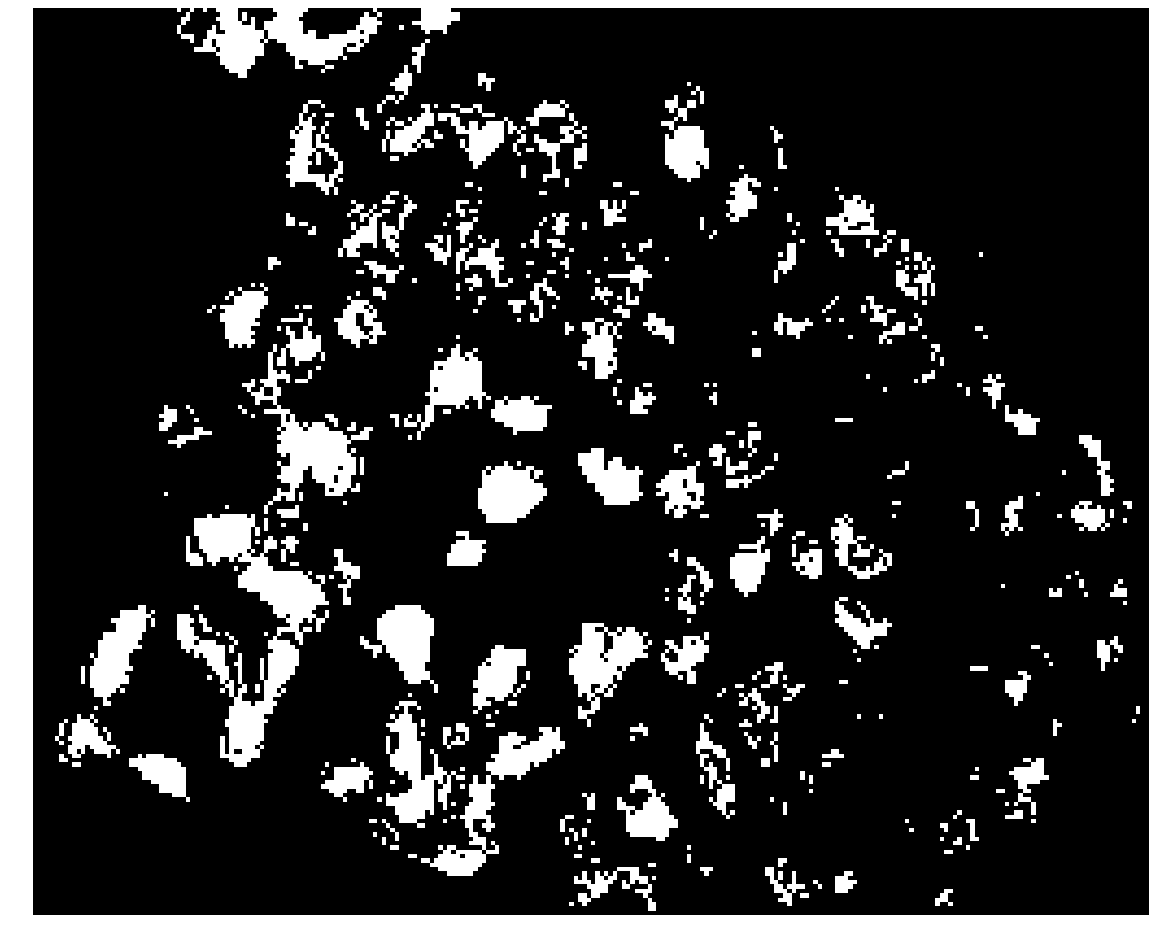

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from Settings.SettingsKi67 import Settings as Settings
import Settings.GeneralSettings as generalSettings

settings = Settings(generalSettings)
result_data = pickle.load(open(settings.backup_folder + "Test_df_results.p", "rb"))
result_data = result_data.sort_index()

results = np.reshape(np.array(result_data["Decision Fuzzy"]), (-1, 256))
results = [np.ones(3) if j == "blue" else np.zeros(3) for row in results for j in row]
results = np.array(results)
results = results.reshape((-1, 256, 3))

fig = plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(results)
plt.savefig('10712-09-part-Result.png')

In [9]:
from skimage.morphology import binary_closing
from skimage.morphology import disk, remove_small_objects
from skimage.color import rgb2gray
from skimage import data, io, segmentation, color
grayscale = rgb2gray(results)
binary = binary_closing(grayscale, disk(6))
removed_objects = remove_small_objects(binary, 5)

In [10]:
binary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

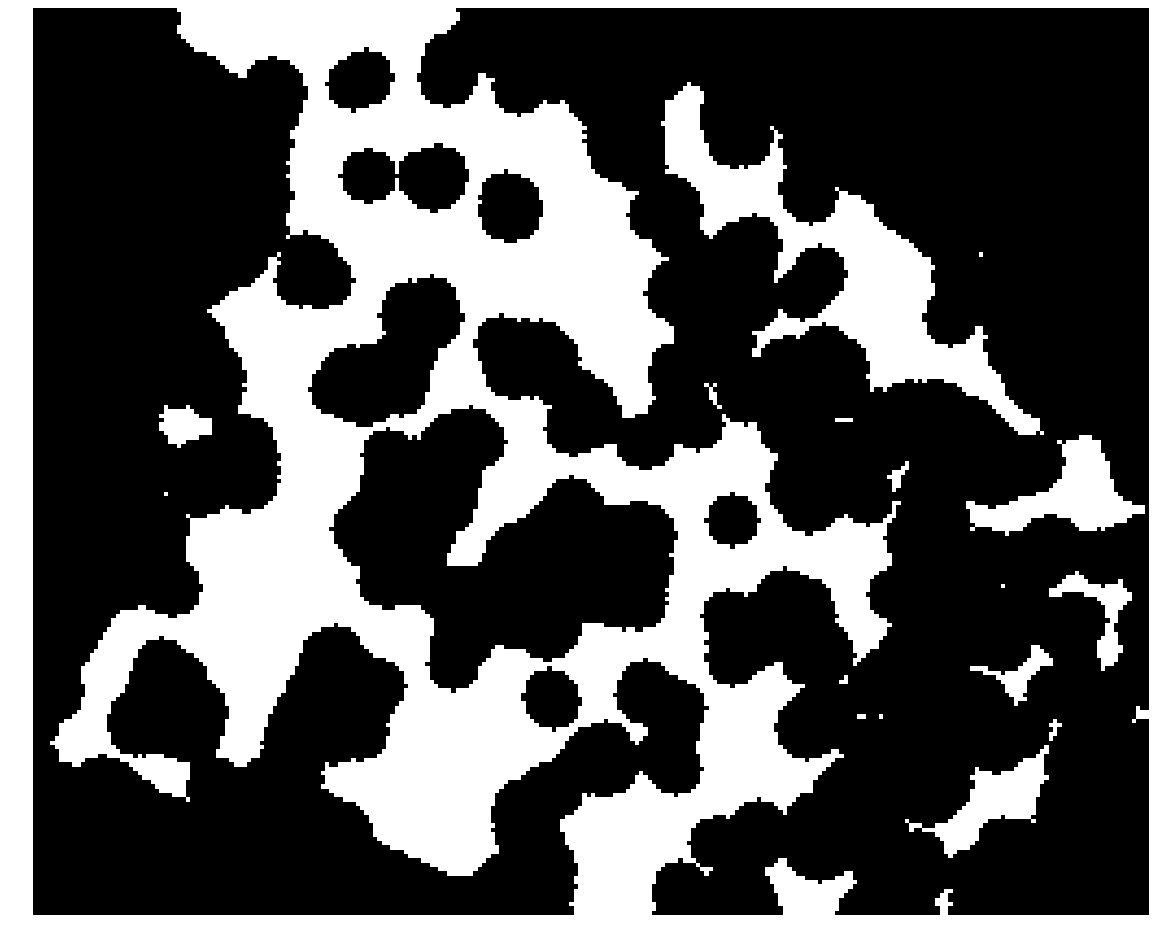

In [11]:
fig = plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(binary, cmap=plt.cm.gray,)
# plt.savefig('10712-09-part-Result.png')

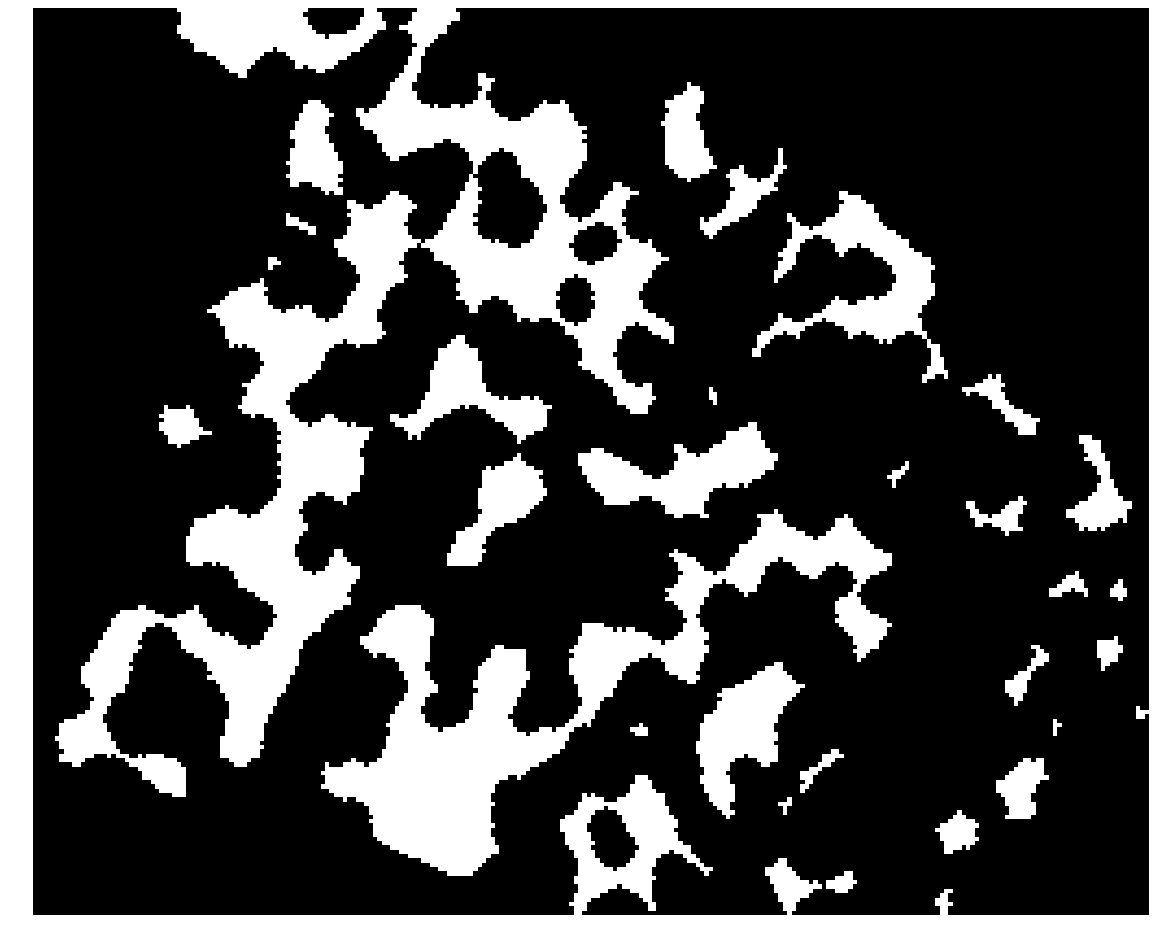

In [7]:
fig = plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(removed_objects, cmap=plt.cm.gray)
plt.savefig('10712-09-part-Result.png', cmap=plt.cm.gray)

Text(0.5, 1.0, 'Separated objects')

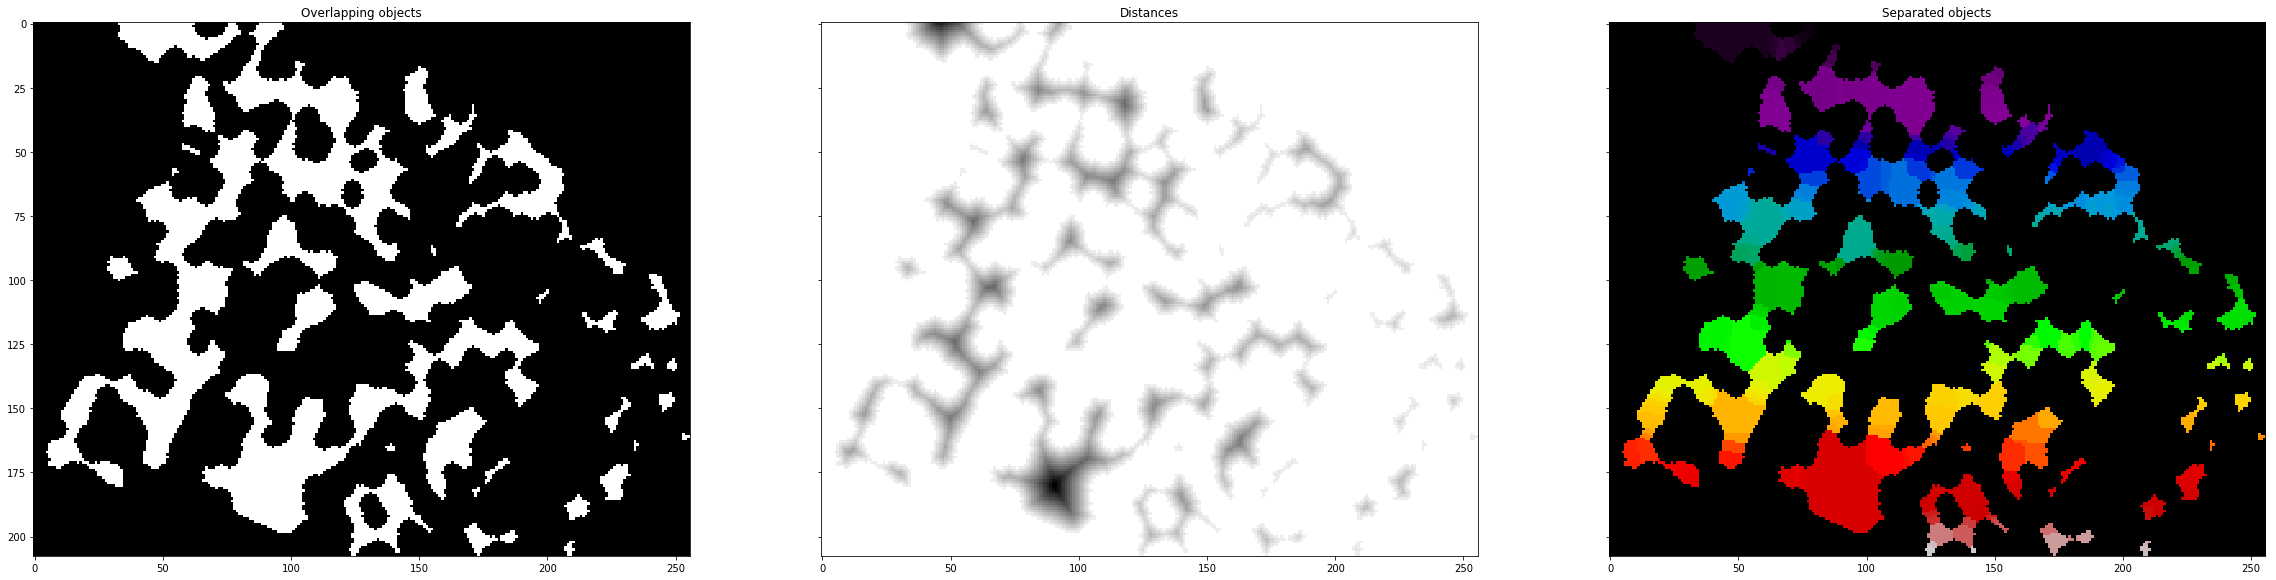

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

distance = ndi.distance_transform_edt(removed_objects)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=removed_objects)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=removed_objects)

fig, axes = plt.subplots(ncols=3, figsize=(40, 20), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(removed_objects, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')
